In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import joblib

In [4]:
# Load the dataset 
data = pd.read_csv(r"C:\Mostafa\Collage\Graduiation Project\Modelss\Modified_Players_Data.csv")

# Drop the 'goals_scored' column as it is incorrect
data = data.drop(columns=['goals_scored'])

# Remove duplicate rows
data = data.drop_duplicates()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   546 non-null    int64  
 1   Name                 546 non-null    object 
 2   position             546 non-null    object 
 3   team                 546 non-null    object 
 4   saves_per_90         546 non-null    float64
 5   penalties_saved      546 non-null    int64  
 6   own_goals            546 non-null    int64  
 7   clean_sheets         546 non-null    int64  
 8   saves                546 non-null    int64  
 9   minutes              546 non-null    int64  
 10  yellow_cards         546 non-null    int64  
 11  red_cards            546 non-null    int64  
 12  Goals                546 non-null    int64  
 13  Wins                 546 non-null    int64  
 14  Losses               546 non-null    int64  
 15  Goals Conceded       229 non-null    flo

Preproceing

In [6]:
data.isnull().sum()

ID                       0
Name                     0
position                 0
team                     0
saves_per_90             0
penalties_saved          0
own_goals                0
clean_sheets             0
saves                    0
minutes                  0
yellow_cards             0
red_cards                0
Goals                    0
Wins                     0
Losses                   0
Goals Conceded         317
Tackles                 58
Tackle success %       185
Interceptions           58
Recoveries             185
Duels won              185
Duels lost             185
Aerial battles won     185
Aerial battles lost    185
Assists                  0
Passes                   0
Big Chances Created     58
Cross accuracy %       185
Accurate long balls    127
Fouls                    0
Headed goals            58
Shots                  229
Shots on target        229
Shooting accuracy %    229
Big chances missed     229
Saves                  488
dtype: int64

In [7]:
# اختيار الأعمدة الرقمية فقط
numeric_data = data.select_dtypes(include='number')

# حساب مصفوفة الارتباط
corr_matrix = numeric_data.corr()

# عرضها
print(corr_matrix)


                           ID  saves_per_90  penalties_saved  own_goals  \
ID                   1.000000      0.009718         0.026159   0.004806   
saves_per_90         0.009718      1.000000         0.325650   0.127751   
penalties_saved      0.026159      0.325650         1.000000  -0.009186   
own_goals            0.004806      0.127751        -0.009186   1.000000   
clean_sheets        -0.085020      0.067945         0.050185   0.093426   
saves                0.027553      0.841456         0.384953   0.187761   
minutes             -0.022947      0.194778         0.111909   0.185463   
yellow_cards         0.012089     -0.003372         0.001071   0.166595   
red_cards            0.087884     -0.039181        -0.013686   0.010259   
Goals               -0.055098     -0.079043        -0.027611  -0.012797   
Wins                -0.107987      0.045956         0.025008   0.074288   
Losses               0.054927      0.144782         0.028910   0.148243   
Goals Conceded       0.01

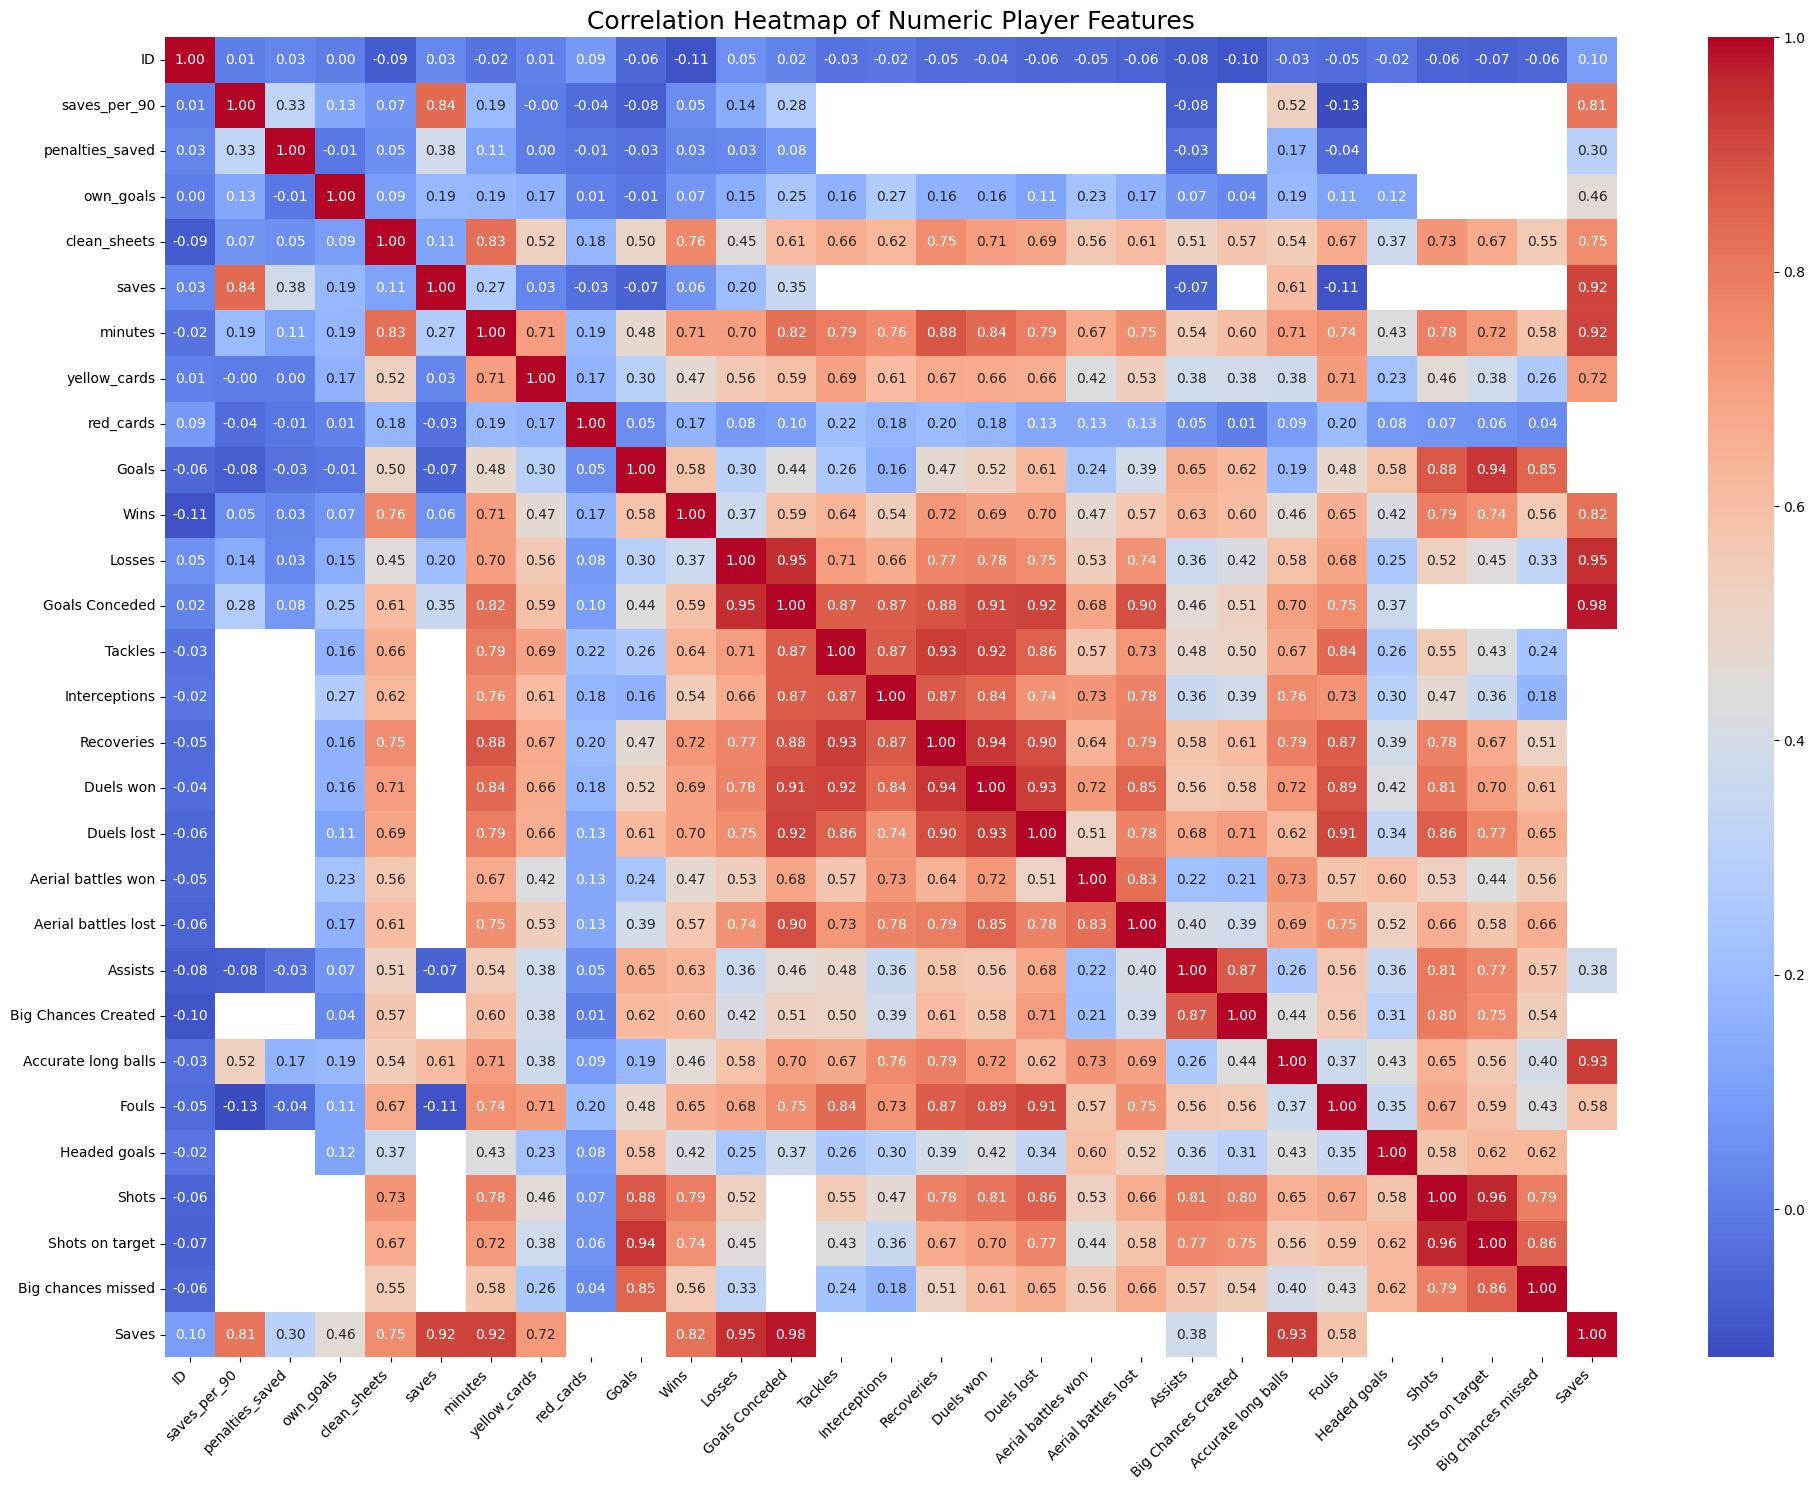

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 10})
plt.title("Correlation Heatmap of Numeric Player Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
print(data.columns)

Index(['ID', 'Name', 'position', 'team', 'saves_per_90', 'penalties_saved',
       'own_goals', 'clean_sheets', 'saves', 'minutes', 'yellow_cards',
       'red_cards', 'Goals', 'Wins', 'Losses', 'Goals Conceded', 'Tackles',
       'Tackle success %', 'Interceptions', 'Recoveries', 'Duels won',
       'Duels lost', 'Aerial battles won', 'Aerial battles lost', 'Assists',
       'Passes', 'Big Chances Created', 'Cross accuracy %',
       'Accurate long balls', 'Fouls', 'Headed goals', 'Shots',
       'Shots on target', 'Shooting accuracy %', 'Big chances missed',
       'Saves'],
      dtype='object')


In [10]:
# فلترة الأعمدة اللي فيها "min"
print([col for col in data.columns if 'min' in col.lower()])

['minutes']


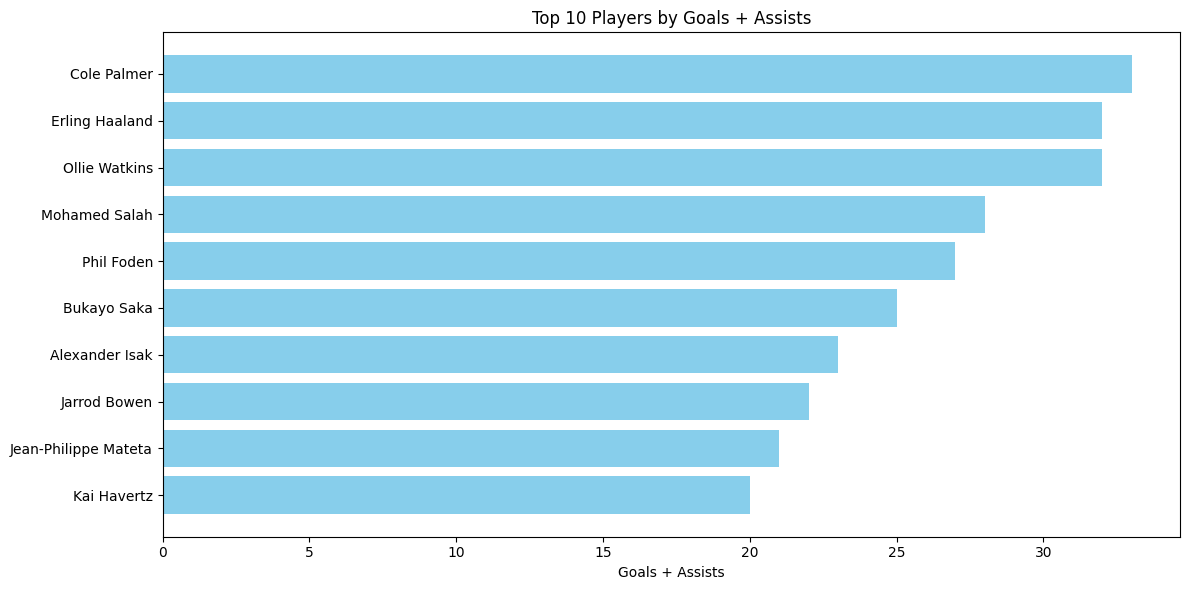

In [11]:
data['Goals_Assists'] = data['Goals'] + data['Assists']

# ترتيب اللاعبين حسب الأهداف + الصناعات
top_15 = data.sort_values(by='Goals_Assists', ascending=False).head(10)

# رسم البار شارت
plt.figure(figsize=(12, 6))
plt.barh(top_15['Name'], top_15['Goals_Assists'], color='skyblue')
plt.xlabel('Goals + Assists')
plt.title('Top 10 Players by Goals + Assists')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


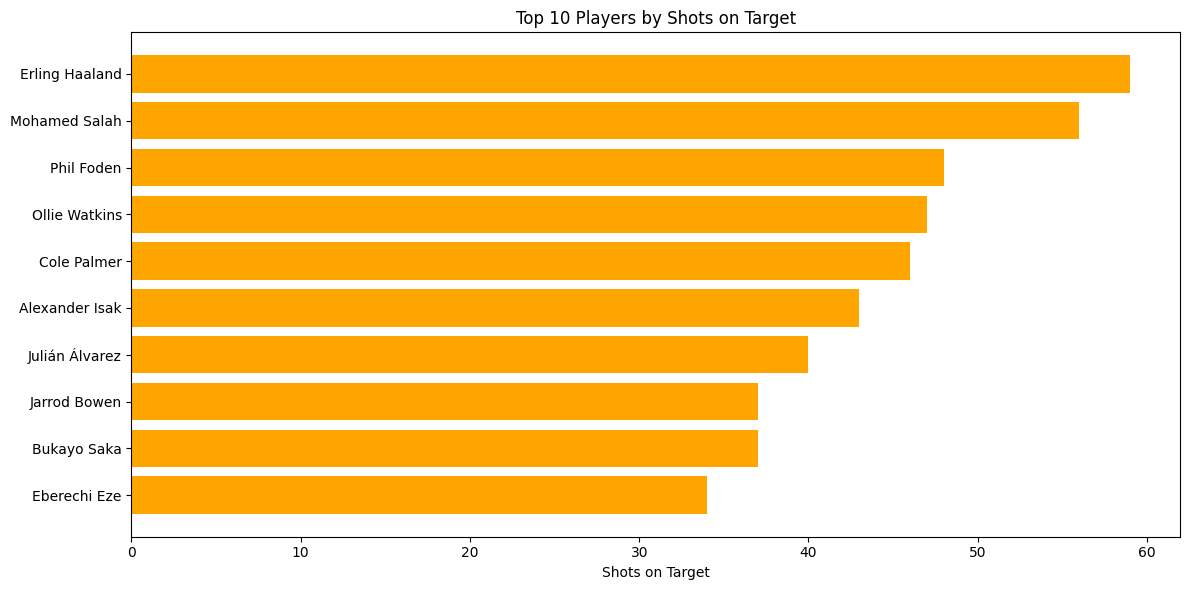

In [12]:
top_shooters = data.sort_values(by='Shots on target', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_shooters['Name'], top_shooters['Shots on target'], color='orange')
plt.xlabel('Shots on Target')
plt.title('Top 10 Players by Shots on Target')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

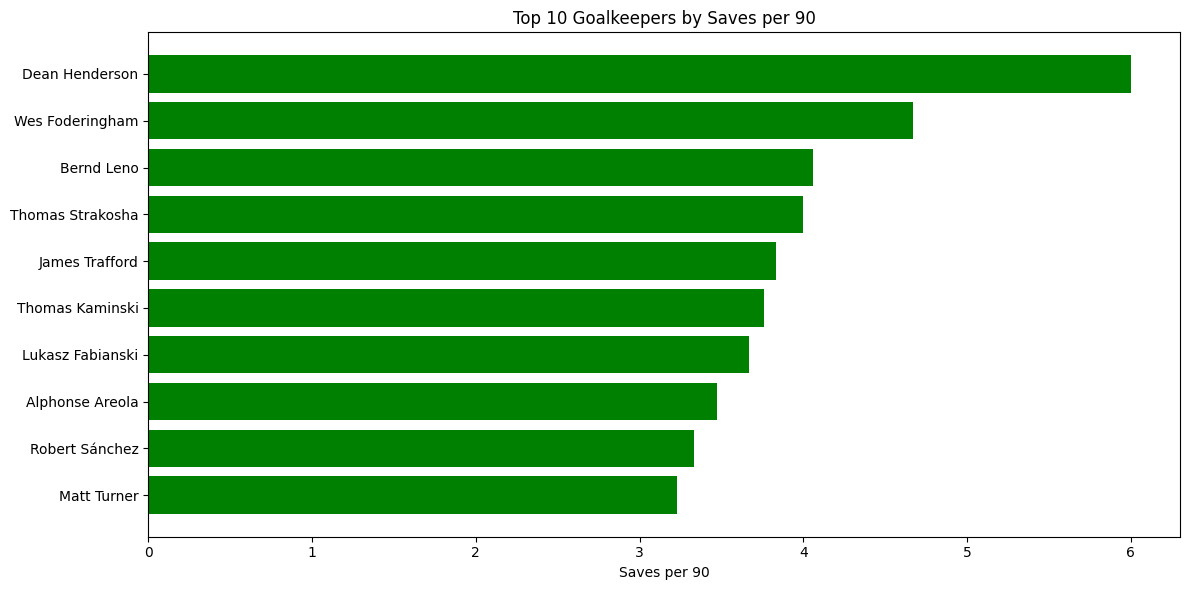

In [13]:
top_keepers = data.sort_values(by='saves_per_90', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_keepers['Name'], top_keepers['saves_per_90'], color='green')
plt.xlabel('Saves per 90')
plt.title('Top 10 Goalkeepers by Saves per 90')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

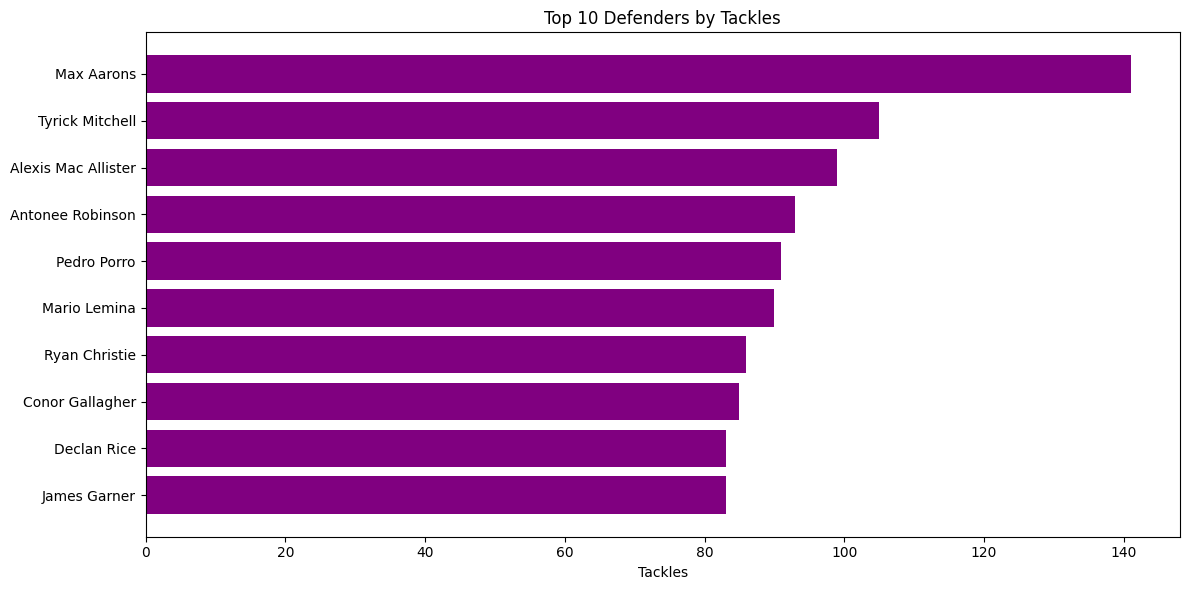

In [14]:
top_defenders = data.sort_values(by='Tackles', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_defenders['Name'], top_defenders['Tackles'], color='purple')
plt.xlabel('Tackles')
plt.title('Top 10 Defenders by Tackles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

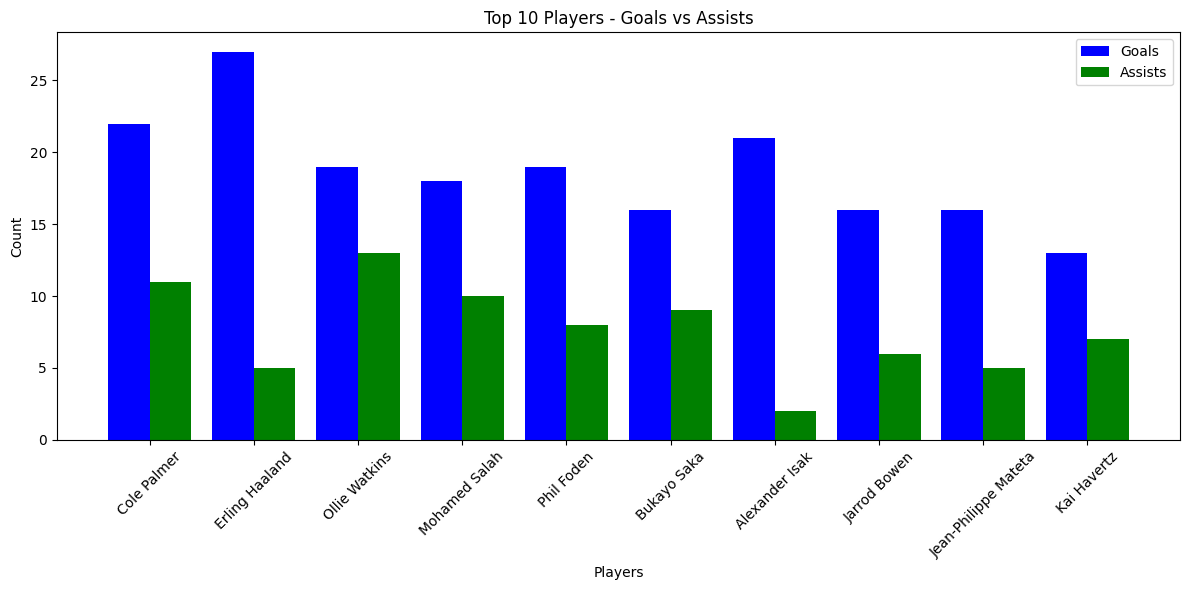

In [15]:
top_contributors = data.sort_values(by='Goals_Assists', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(top_contributors))

plt.bar(index, top_contributors['Goals'], bar_width, label='Goals', color='blue')
plt.bar([i + bar_width for i in index], top_contributors['Assists'], bar_width, label='Assists', color='green')

plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Top 10 Players - Goals vs Assists')
plt.xticks([i + bar_width / 2 for i in index], top_contributors['Name'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

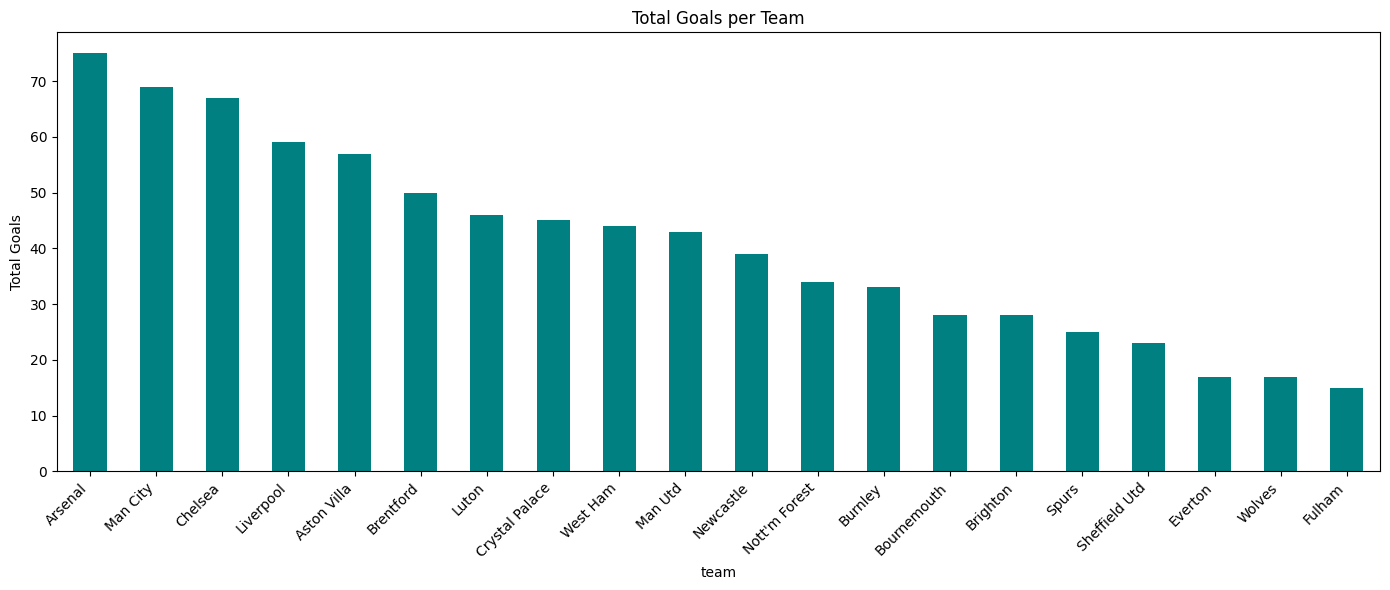

In [16]:
team_goals = data.groupby('team')['Goals'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
team_goals.plot(kind='bar', color='teal')
plt.ylabel('Total Goals')
plt.title('Total Goals per Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

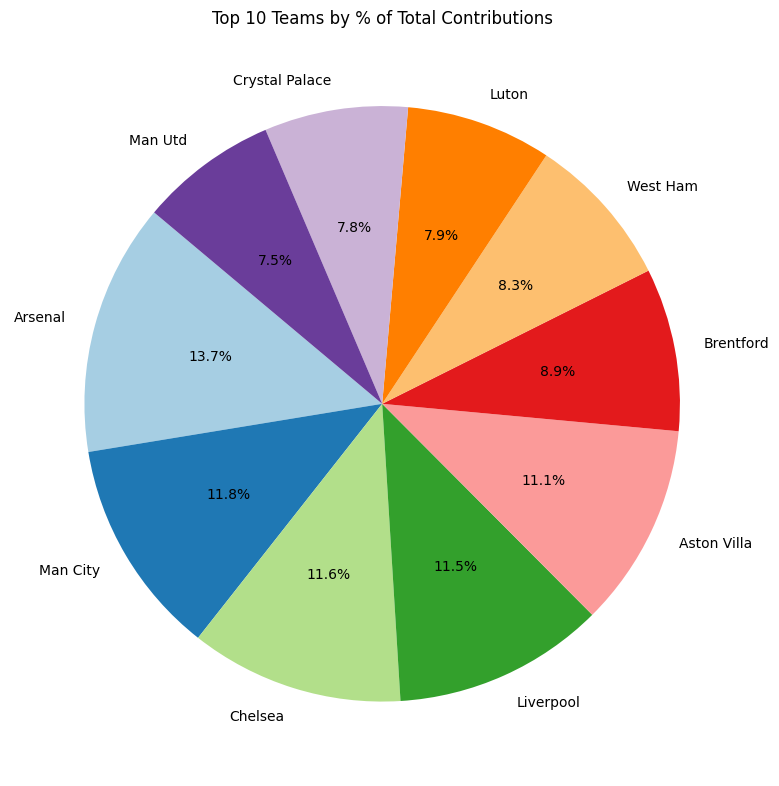

In [17]:
data['Total_Contributions'] = data['Goals'] + data['Assists']

team_contributions = data.groupby('team')['Total_Contributions'].sum()
team_contributions_percent = team_contributions / team_contributions.sum() * 100

# نعرض أكبر 10 فرق فقط
top_teams = team_contributions_percent.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Teams by % of Total Contributions')
plt.tight_layout()
plt.show()

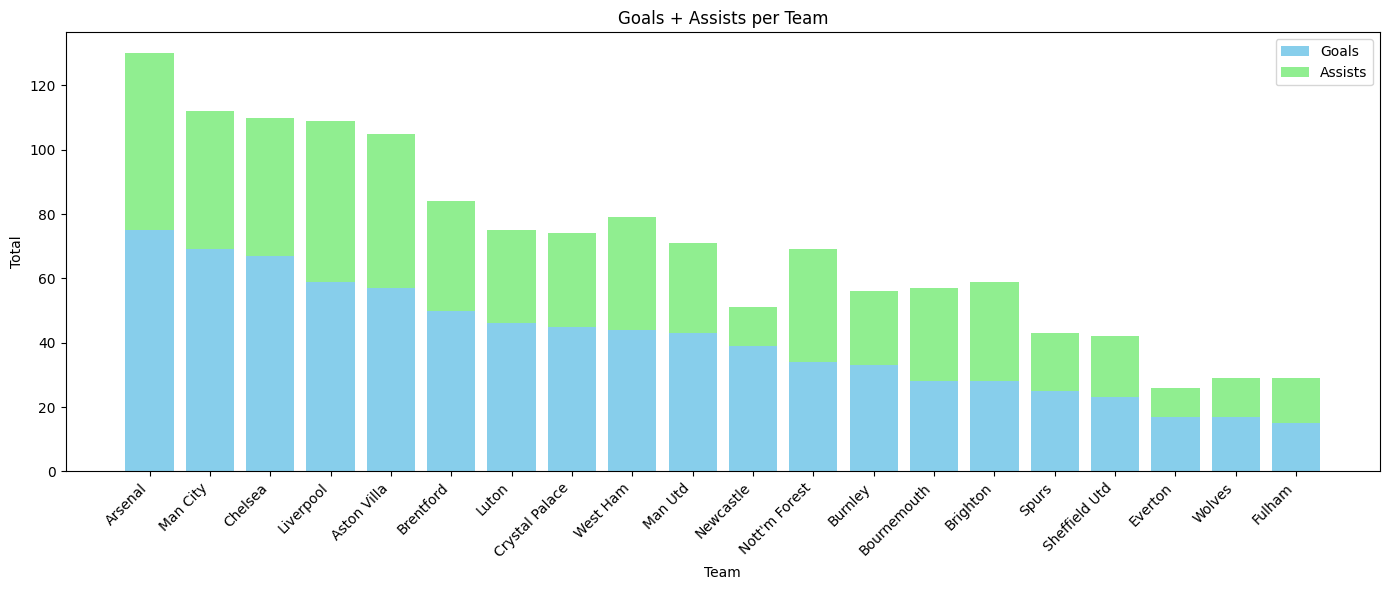

In [19]:
team_stats = data.groupby('team')[['Goals', 'Assists']].sum().sort_values(by='Goals', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(team_stats.index, team_stats['Goals'], label='Goals', color='skyblue')
plt.bar(team_stats.index, team_stats['Assists'], bottom=team_stats['Goals'], label='Assists', color='lightgreen')

plt.xlabel('Team')
plt.ylabel('Total')
plt.title('Goals + Assists per Team')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

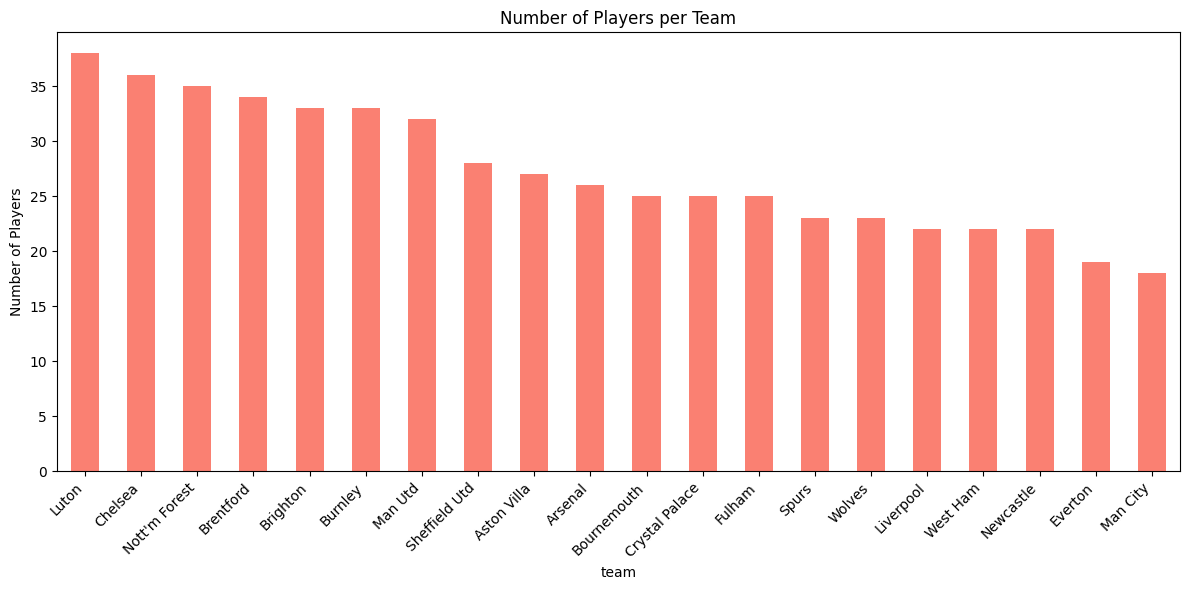

In [20]:
team_counts = data['team'].value_counts()

plt.figure(figsize=(12, 6))
team_counts.plot(kind='bar', color='salmon')
plt.ylabel('Number of Players')
plt.title('Number of Players per Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# Function to convert percentage strings to float values
def convert_percentage(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if '%' in value:
            return float(value.strip('%')) / 100
        # Remove commas from numbers like '1,900'
        value = value.replace(',', '')
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

# List of numeric columns
numeric_columns = [
    'saves_per_90', 'penalties_saved', 'own_goals', 'clean_sheets', 'saves',
    'minutes', 'yellow_cards', 'red_cards', 'Goals', 'Wins', 'Losses',
    'Goals Conceded', 'Tackles', 'Interceptions', 'Recoveries', 'Duels won',
    'Duels lost', 'Aerial battles won', 'Aerial battles lost', 'Assists',
    'Passes', 'Big Chances Created', 'Accurate long balls', 'Fouls',
    'Headed goals', 'Shots', 'Shots on target', 'Big chances missed'
]

# Convert all numeric columns
for col in numeric_columns:
    if col in data.columns:
        data[col] = data[col].apply(convert_percentage)

# Convert percentage columns
percentage_columns = ['Tackle success %', 'Cross accuracy %', 'Shooting accuracy %']
for col in percentage_columns:
    if col in data.columns:
        data[col] = data[col].apply(convert_percentage)

In [22]:
# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Handle missing values for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Handle missing values for non-numeric columns with mode
data[non_numeric_cols] = data[non_numeric_cols].fillna(data[non_numeric_cols].mode().iloc[0])

In [23]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['position', 'team']
for col in categorical_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

In [24]:
# Create new features
data['Total_Contributions'] = data['Goals'] + data['Assists']
data['Minutes_per_Goal'] = data['minutes'] / (data['Goals'] + 1)
data['Minutes_per_Assist'] = data['minutes'] / (data['Assists'] + 1)

# Drop unnecessary columns
columns_to_drop = ['minutes', 'Name']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

In [25]:
# Function to bin goals/assists into categories
def bin_values(x):
    if x == 0:
        return 0
    elif x <= 5:
        return 1
    elif x <= 10:
        return 2
    elif x <= 15:
        return 3
    elif x <= 20:
        return 4
    else:
        return 5

# Create binned versions of goals and assists for classification
data['Goals_Category'] = data['Goals'].apply(bin_values)
data['Assists_Category'] = data['Assists'].apply(bin_values)

In [26]:
# Separate features and target variables
X = data.drop(columns=['Goals', 'Assists', 'Goals_Category', 'Assists_Category'])
y_goals = data['Goals']  # For regression
y_assists = data['Assists']  # For regression
y_goals_cat = data['Goals_Category']  # For classification
y_assists_cat = data['Assists_Category']  # For classification

In [27]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Split the data for regression
X_train_reg, X_test_reg, y_train_goals_reg, y_test_goals_reg, y_train_assists_reg, y_test_assists_reg = train_test_split(
    X_scaled, y_goals, y_assists, test_size=0.2, random_state=42
)

# Split the data for classification
X_train_clf, X_test_clf, y_train_goals_clf, y_test_goals_clf, y_train_assists_clf, y_test_assists_clf = train_test_split(
    X_scaled, y_goals_cat, y_assists_cat, test_size=0.2, random_state=42
)

In [29]:
# Initialize models
# Regression models
xgb_goals_reg = XGBRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

xgb_assists_reg = XGBRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

# Classification models
xgb_goals_clf = XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

xgb_assists_clf = XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

In [30]:
# Train the models
print("Training regression models...")
xgb_goals_reg.fit(X_train_reg, y_train_goals_reg)
xgb_assists_reg.fit(X_train_reg, y_train_assists_reg)

print("Training classification models...")
xgb_goals_clf.fit(X_train_clf, y_train_goals_clf)
xgb_assists_clf.fit(X_train_clf, y_train_assists_clf)

Training regression models...
Training classification models...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
# Make predictions
# Regression predictions
y_pred_goals_reg = xgb_goals_reg.predict(X_test_reg)
y_pred_assists_reg = xgb_assists_reg.predict(X_test_reg)

# Classification predictions
y_pred_goals_clf = xgb_goals_clf.predict(X_test_clf)
y_pred_assists_clf = xgb_assists_clf.predict(X_test_clf)

In [32]:
# Evaluate regression models
def evaluate_regression(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nRegression Results for {model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

# Evaluate classification models
def evaluate_classification(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\nClassification Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Print evaluation results
print("\nEvaluating Models:")
evaluate_regression(y_test_goals_reg, y_pred_goals_reg, "Goals")
evaluate_regression(y_test_assists_reg, y_pred_assists_reg, "Assists")
evaluate_classification(y_test_goals_clf, y_pred_goals_clf, "Goals Categories")
evaluate_classification(y_test_assists_clf, y_pred_assists_clf, "Assists Categories")


Evaluating Models:

Regression Results for Goals:
Mean Squared Error: 0.3524
Root Mean Squared Error: 0.5937
R2 Score: 0.9587

Regression Results for Assists:
Mean Squared Error: 0.2111
Root Mean Squared Error: 0.4594
R2 Score: 0.9337

Classification Results for Goals Categories:
Accuracy: 92.73%
Precision: 0.9178
Recall: 0.9273
F1 Score: 0.9213

Classification Results for Assists Categories:
Accuracy: 97.27%
Precision: 0.9727
Recall: 0.9727
F1 Score: 0.9726


c:\Users\Mostafa Ismael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Save the models
joblib.dump(xgb_goals_reg, 'goals_regression_model.pkl')
joblib.dump(xgb_assists_reg, 'assists_regression_model.pkl')
joblib.dump(xgb_goals_clf, 'goals_classification_model.pkl')
joblib.dump(xgb_assists_clf, 'assists_classification_model.pkl')

['assists_classification_model.pkl']